<h1><center>Tutorial - AVO Tuning</center></h1>

### Generate a zero-offset synthetic from a 3-layer wedge model.

In [1]:
#Import libraries
from pyavo.seismodel import tuning_wedge as tw
from pyavo.seismodel import wavelet
import numpy as np

__1. Generate data for 3-layer model parameters [Layer1, Layer2, Layer 3]__

In [2]:
rho_data = [1.97, 2.0, 1.98] # Density(g/cc)
vp_data = [2400.0, 2500.0, 2450.0] # P-wave velocity(m/s)

__2. Create model__

In [3]:
# Create model
nmodel = tw.n_model(h_min=0.0, h_max=60.0)
print(nmodel)

61


__3. Calculate reflectivities from model parameters__

In [4]:
rc_int = tw.get_rc(Vp=vp_data, rho=rho_data)

__4. Generate ricker wavelet__

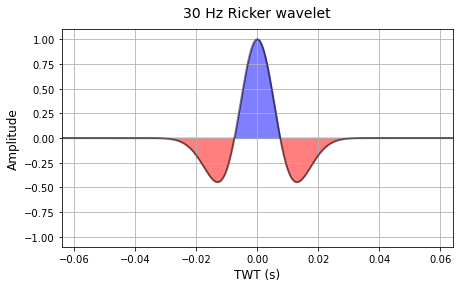

In [5]:
wavelet.plot_ricker(sample_rate=0.0001, length=0.128, c_freq=30)

In [6]:
wlt_time, wlt_amp = wavelet.ricker(sample_rate=0.0001, length=0.128, c_freq=50.0)

__5. Compute interface depths, times and generate synthetic seismogram__

In [7]:
lyr_times = [] # Layer times
refl_z = [] # Reflection coeff
syn_zo = [] # Synthetic Seismogram

In [8]:
for model in range(0, nmodel):
    # Calculate Interface Depths
    z_int = tw.int_depth(h_int=[500.0], dh_min=0.0, dh_step=1, mod=model)

    #   Calculate interface times
    t_int = tw.calc_times(z_int, vp_data)
    lyr_times.append(t_int)

    #   Digitize 3-layer model
    t_samp = tw.time_samples(t_min=0, t_max=0.5)

    rc = tw.mod_digitize(rc_int, t_int, t_samp)
    refl_z.append(rc)

    #   Convolve wavelet with reflectivity
    s = tw.syn_seis(ref_coef=rc, wav_amp=wlt_amp)
    syn_zo.append(s)

__6. Convert data arrays from lists/tuples to numpy arrays__

In [9]:
syn_zo = np.array(syn_zo)
t_samp = np.array(t_samp)
lyr_times = np.array(lyr_times)

__7. Display Wedge Model__

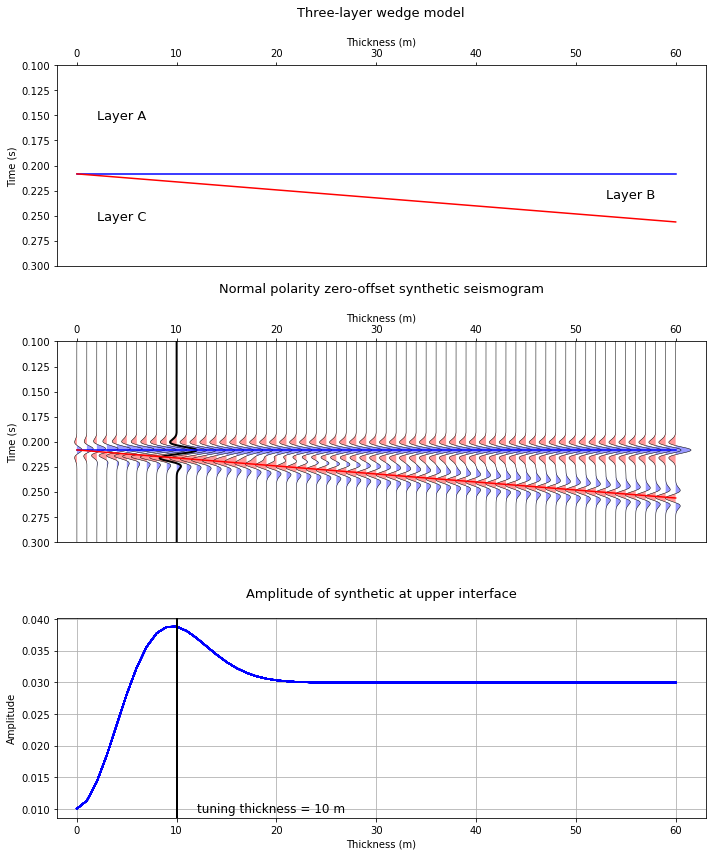

In [10]:
tw.wedge_model(syn_zo, lyr_times, t_samp,
               t_min=0.1, t_max=0.3, h_max=60.0,
               h_step=1, excursion=2)

### Generate a synthetic angle gather from a 3-layer property model to examine pre-stack tuning effects.

In [11]:
#Import libraries
from pyavo.seismodel import tuning_prestack as tp
from pyavo.seismodel import wavelet
import numpy as np

__1. Generate data for 3-layer model parameters [Layer1, Layer2, Layer 3]__

In [12]:
# Data
vp_data = [2400.0, 2500.0, 2450.0]  # P-wave velocity (m/s)
vs_data = [1400.0, 1500.0, 1400.0]  # S-wave velocity (m/s)
rho_data = [1.97, 2.0, 1.98]  # Density (g/cc)

__2. Create model__

In [13]:
# Create model
nangles = tp.n_angles(0, 45) #Generate no of angles
nangles

46

__3. Calculate reflectivities from model parameters__

In [14]:
rc_zoep = []
theta1 = []

for angle in range(0, nangles):
    theta1_samp, rc_1, rc_2 = tp.calc_theta_rc(theta1_min=0, theta1_step=1, 
                                                            vp=vp_data, vs=vs_data, rho=rho_data, ang=angle)
    theta1.append(theta1_samp)
    rc_zoep.append([rc_1[0, 0], rc_2[0, 0]])

print(f'Reflection Coeff: {rc_zoep}')
print(f'Angles of Incidence: {theta1}')

Reflection Coeff: [[0.02796052631578963, -0.015125367982945798], [0.02793448834125242, -0.015096738415456902], [0.027856427520563356, -0.015010898396110629], [0.02772650321008014, -0.014867993959862472], [0.027544981163359912, -0.014668268450643689], [0.027312233774065015, -0.014412062451114389], [0.027028740423017273, -0.014099813686819406], [0.026695087936501178, -0.01373205690728772], [0.026311971165134326, -0.013309423747377591], [0.025880193694955436, -0.012832642572988502], [0.025400668704912647, -0.012302538316103366], [0.024874419987660813, -0.01172003230504335], [0.024302583153580134, -0.011086142096794139], [0.02368640704124185, -0.010401981319313268], [0.023027255361233095, -0.009668759532888947], [0.02232660860438531, -0.008887782120879064], [0.021586066250117247, -0.008060450221556704], [0.02080734931588048, -0.007188260714320627], [0.019992303294705645, -0.006272806275262338], [0.019142901534744773, -0.005315775518988287], [0.01826124912259338, -0.00431895324575419], [0.0

__4. Generate ricker wavelet__

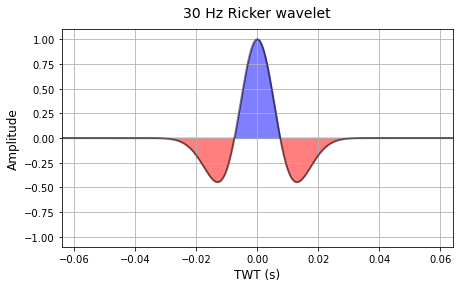

In [15]:
wavelet.plot_ricker(sample_rate=0.0001, length=0.128, c_freq=30)

In [16]:
wlt_time, wlt_amp = wavelet.ricker(sample_rate=0.0001, length=0.128, c_freq=50.0)

__5. Define time sample vector for output model & traces__

In [17]:
t_samp = tp.time_samples(t_min=0, t_max=0.5)

__6. Compute interface depths, times and generate synthetic seismogram__

In [18]:
syn_zoep = []
lyr_times = []

for angle in range(0, nangles):
    #   Calculate interface depths
    z_int = tp.int_depth(h_int=[500.0], thickness=10)

    #   Calculate interface times
    t_int = tp.calc_times(z_int, vp_data)
    lyr_times.append(t_int)

    #   Digitize 3-layer model
    rc = tp.mod_digitize(rc_zoep[angle], t_int, t_samp)

    #   Convolve wavelet with reflectivities
    s = tp.syn_seis(ref_coef=rc, wav_amp=wlt_amp)
    syn_zoep.append(s)

__7. Convert data arrays from lists/tuples to numpy arrays__

In [19]:
syn_zoep = np.array(syn_zoep)
rc_zoep = np.array(rc_zoep)
t = np.array(t_samp)
lyr_times = np.array(lyr_times)

__8. Create array indices corresponding to top/base interfaces__

In [20]:
lyr1_indx, lyr2_indx = tp.layer_index(lyr_times)

[ntrc, nsamp] = syn_zoep.shape #split seismogram to traces and time samples

top_layer = []
bottom_layer = []

for trace in range(0, ntrc):
    top_layer.append(syn_zoep[trace, lyr1_indx[trace]])
    bottom_layer.append(syn_zoep[trace, lyr2_indx[trace]])

__9. Create a "digital" time domain version of the input property model.__

In [21]:
vp_dig, vs_dig, rho_dig = tp.t_domain(t=t, vp=vp_data, vs=vs_data,rho=rho_data, 
                                      lyr1_index=lyr1_indx, lyr2_index=lyr2_indx)

__10. Show avo inverted values__

In [22]:
tp.avo_inv(rc_zoep, ntrc, top_layer) #intercept and gradient

{'Zoeppritz': (array([0.02692061]), array([-0.06922966])),
 'Convolved': (array([0.03329093]), array([-0.1065501]))}

__10. Display Synthetic angle gather__

In [23]:
# Plotting Display Parameters
min_plot_time = 0.15
max_plot_time = 0.3
excursion = 2
thickness = 10

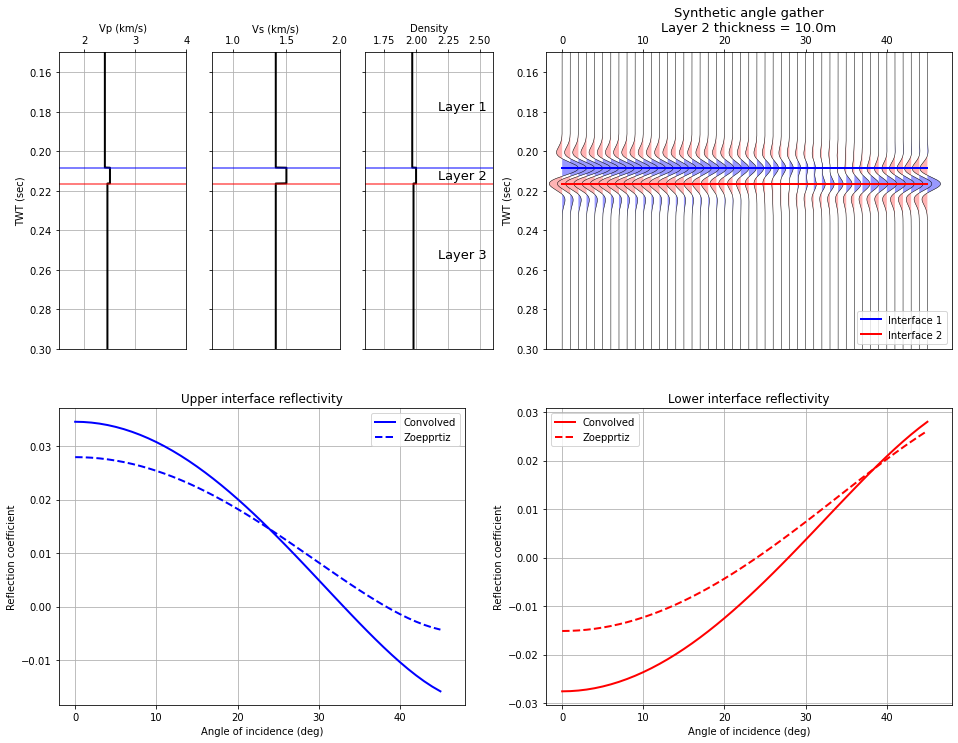

In [24]:
#Plot gathers
tp.syn_angle_gather(min_plot_time, max_plot_time, lyr_times, 
                    thickness, top_layer, bottom_layer,
                    vp_dig, vs_dig, rho_dig, syn_zoep, 
                    rc_zoep, t, excursion)

__Further reading:__
    
Aki, K., and P. G. Richards, 2002, Quantitative seismology, 2nd ed.: University Science Books.

Chung, H.-M., and D. C. Lawton, 1999, A quantitative study of the effects of tuning on AVO effects for thin beds: Canadian Journal of Exploration Geophysics, 35, nos. 1–2, 36–42.

Mavko, G., T. Mukerji, and J. Dvorkin, 2009, The rock physics handbook: Tools for seismic analysis of porous media, 2nd ed.: Cambridge University Press. CrossRef

Shuey, R. T., 1985, A simplification of the Zoeppritz equations: Geophysics, 50, no. 4, 609–614, http://dx.doi.org/10.1190/1.1441936.

Widess, M., 1973, How thin is a thin bed?: Geophysics, 38, no. 6, 1176–1180, http://dx.doi.org/10.1190/1.1440403.

https://wiki.seg.org/wiki/Thin_beds,_tuning,_and_AVO